In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from mpose import MPOSE
import numpy as np
import matplotlib.pyplot as plt
from mpose.utils import plot_pose

In [3]:
pose_extractor = 'openpose'
split = 1

In [4]:
dataset = MPOSE(pose_extractor=pose_extractor, 
                split=split, 
                preprocess=None, 
                velocities=False, 
                remove_zip=False)

Initializing MPOSE2021 with openpose Pose Extractor
file exists in ./tmp/openpose.zip. specify overwrite=True if intended
Extracting Archive to ./tmp/...


In [5]:
dataset.get_info()

----Dataset Information----
Pose Extractor: openpose
Split: openpose
X_train shape: (12562, 30, 25, 3)
X_test shape: (2867, 30, 25, 3)
Min-Max feature ranges:
x: [0.0, 828.042]
y: [0.0, 558.729]
p: [0.0, 1.0]


In [6]:
X_train, y_train, X_test, y_test = dataset.get_data()
print(X_train.shape, X_test.shape)

(12562, 30, 25, 3) (2867, 30, 25, 3)


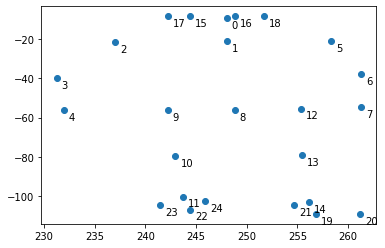

In [7]:
pose = X_train[1000,15,:,:]
plot_pose(pose)

In [26]:
dataset.scale_to_unit()
dataset.add_velocities()
dataset.reduce_keypoints()

Keypoint number has already been reduced!


In [27]:
dataset.get_info()

----Dataset Information----
Pose Extractor: openpose
Split: openpose
X_train shape: (12562, 30, 15, 5)
X_test shape: (2867, 30, 15, 5)
Min-Max feature ranges:
x: [0.0, 1.0]
y: [0.0, 1.0]
Vx: [-1.0, 1.0]
Vy: [-1.0, 1.0]
p: [0.0, 1.0]


In [28]:
X_train, y_train, X_test, y_test = dataset.get_data()
print(X_train.shape, X_test.shape)

(12562, 30, 15, 5) (2867, 30, 15, 5)


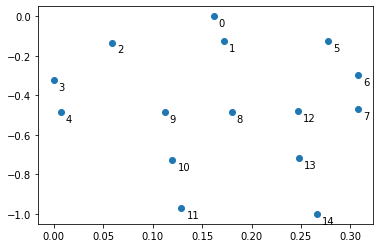

In [29]:
pose = X_train[1000,15,:,:]
plot_pose(pose)

In [30]:
dataset.scale_and_center()

In [31]:
dataset.get_info()

----Dataset Information----
Pose Extractor: openpose
Split: openpose
X_train shape: (12562, 30, 13, 5)
X_test shape: (2867, 30, 13, 5)
Min-Max feature ranges:
x: [-1.0, 1.0]
y: [-0.9995300432531916, 1.0]
Vx: [-2.0, 2.0]
Vy: [-1.9995300432531917, 1.9990533747064134]
p: [0.0, 1.0]


In [32]:
X_train, y_train, X_test, y_test = dataset.get_data()
print(X_train.shape, X_test.shape)

(12562, 30, 13, 5) (2867, 30, 13, 5)


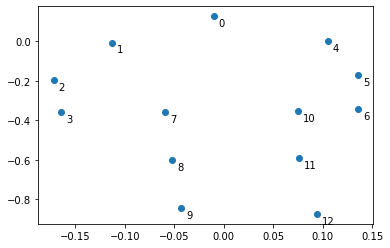

In [33]:
pose = X_train[1000,15,:,:]
plot_pose(pose)

In [34]:
def center(X):
    seq_list = []
    for seq in X:
        pose_list = []
        for pose in seq:
            zero_point = (pose[6, :2] + pose[5,:2]) / 2
            pose[:,:2] = (pose[:,:2] - zero_point)
            pose_list.append(pose)
        seq = np.stack(pose_list)
        seq_list.append(seq)
    X = np.stack(seq_list)
    return X

In [35]:
func = center

dataset.transform(func)

In [36]:
dataset.get_info()

----Dataset Information----
Pose Extractor: openpose
Split: openpose
X_train shape: (12562, 30, 13, 5)
X_test shape: (2867, 30, 13, 5)
Min-Max feature ranges:
x: [-1.0, 1.0]
y: [-0.9999814805016138, 1.0]
Vx: [-2.0, 2.0]
Vy: [-1.9995300432531917, 1.9990533747064134]
p: [0.0, 1.0]


In [37]:
X_train, y_train, X_test, y_test = dataset.get_data()
print(X_train.shape, X_test.shape)

(12562, 30, 13, 5) (2867, 30, 13, 5)


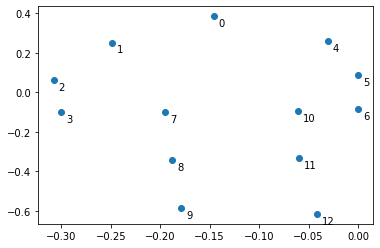

In [38]:
pose = X_train[1000,15,:,:]
plot_pose(pose)

In [39]:
dataset.reset_data()

In [40]:
dataset.get_info()

----Dataset Information----
Pose Extractor: openpose
Split: openpose
X_train shape: (12562, 30, 25, 3)
X_test shape: (2867, 30, 25, 3)
Min-Max feature ranges:
x: [0.0, 828.042]
y: [0.0, 558.729]
p: [0.0, 1.0]
